In [8]:
# %matplotlib inline

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

Прочитайте csv файл (використовуйте функцію read_csv)

In [9]:
file_csv = "bestsellers with categories.csv"
oryginal_table = pd.read_csv(file_csv)
df = oryginal_table.copy()

Виведіть перші п'ять рядків (використовується функція head)

In [10]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Виведіть розміри датасету (використовуйте атрибут shape)

In [11]:
size=df.shape
print(size)
print(f"Про скільки книг зберігає дані датасет? Відповідь: {size[0]}")

(550, 7)
Про скільки книг зберігає дані датасет? Відповідь: 550


In [12]:
df.columns = ["name", "author", "user_rating", "reviews", "price", "year", "genre"]

# Первинне дослідження даних



Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [13]:
rows=df.isna().sum()
answer = 'Ні'
for row in rows:
    if row:
        answer = 'Так'
print(f'Чи є в якихось змінних пропуски? (Так / ні) Відповідь: {answer}')

Чи є в якихось змінних пропуски? (Так / ні) Відповідь: Ні


Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [14]:
unq_genres = df['genre'].unique()
print(f'Які є унікальні жанри? Відповідь:{unq_genres}')

Які є унікальні жанри? Відповідь:['Non Fiction' 'Fiction']


Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

Text(0, 0.5, 'К-сть')

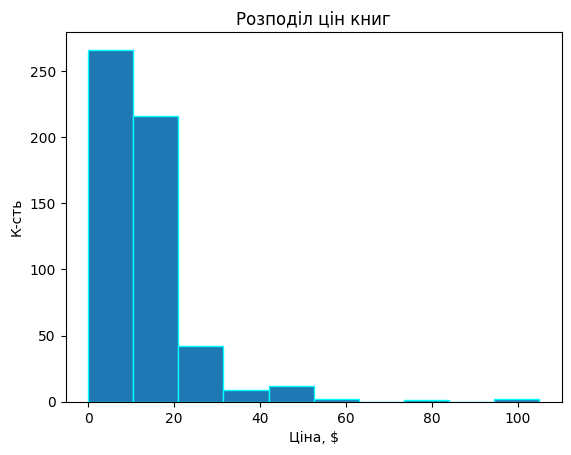

In [15]:
df["price"].plot(kind="hist", bins=10, edgecolor="cyan")

plt.title("Розподіл цін книг")
plt.xlabel("Ціна, $")
plt.ylabel("К-сть")

Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [16]:
print(f'Максимальна ціна? Відповідь: {df['price'].max()}$')
print(f'Мініимальна ціна? Відповідь: {df['price'].min()}$')
print(f'Середняа ціна? Відповідь: {df['price'].mean()}$')
print(f'Медіанна ціна? Відповідь: {df['price'].median()}$')

Максимальна ціна? Відповідь: 105$
Мініимальна ціна? Відповідь: 0$
Середняа ціна? Відповідь: 13.1$
Медіанна ціна? Відповідь: 11.0$


# Пошук та сортування даних

In [17]:
answer = df["user_rating"].max()
print(f"Який рейтинг у датасеті найвищий? \n    Відповідь: {answer}")

Який рейтинг у датасеті найвищий? 
    Відповідь: 4.9


In [18]:
answer = df[(df["user_rating"] == answer)].shape[0]
print(f"Скільки книг мають такий рейтинг? \n    Відповідь: {answer}")

Скільки книг мають такий рейтинг? 
    Відповідь: 52


In [19]:
answer = df[df["reviews"] == df["reviews"].max()]["name"].iloc[0]
print(f"Яка книга має найбільше відгуків? \nВідповідь: {answer}")

Яка книга має найбільше відгуків? 
Відповідь: Where the Crawdads Sing


In [20]:
df1 = df[(df["year"] == 2015)].nlargest(50, "user_rating")
answer = df1[(df1["price"] == df1["price"].max())]["name"].iloc[0]
print(
    f"З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? \n    Відповідь: {answer}"
)

З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? 
    Відповідь: Publication Manual of the American Psychological Association, 6th Edition


In [21]:
answer = df[(df["year"] == 2010) & (df["genre"] == "Fiction")].shape[0]
print(
    f"Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? \n    Відповідь:{answer}"
)

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? 
    Відповідь:20


In [22]:
answer = df[
    (df["user_rating"] == 4.9) & ((df["year"] == 2010) | (df["year"] == 2011))
].shape[0]
answer = df[
    (df["user_rating"] == 4.9) & (df["year"].isin([2010,2011]))].shape[0]
print(
    f"Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? \n    Відповідь:{answer}"
)

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? 
    Відповідь:1


І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

In [23]:
df1=df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price', ascending=True)
print(f'Яка книга остання у відсортованому списку? \nВідповідь: {df1.iloc[-1]["name"]}')

Яка книга остання у відсортованому списку? 
Відповідь: Old School (Diary of a Wimpy Kid #10)


# Агрегування даних та з'єднання таблиць

Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [37]:
df_group = df.groupby(by=['genre'])
new_df = df_group["price"].agg(["min", "max"])
print(new_df)

             min  max
genre                
Fiction        0   82
Non Fiction    0  105


In [46]:
answer = new_df['max'].iloc[0]
print(f"Максимальна ціна для жанру Fiction: Відповідь: {answer}")

Максимальна ціна для жанру Fiction: Відповідь: 82


In [54]:
answer = new_df["min"].iloc[0]
print(f"Мінімальна ціна для жанру Fiction: Відповідь: {answer}")

Мінімальна ціна для жанру Fiction: Відповідь: 0


In [55]:
answer = new_df["max"].iloc[1]
print(f"Максимальна ціна для жанру Non Fiction: Відповідь: {answer}")

Максимальна ціна для жанру Non Fiction: Відповідь: 105


In [56]:
answer = new_df["min"].iloc[1]
print(f"Мінімальна ціна для жанру Non Fiction: Відповідь: {answer}")

Мінімальна ціна для жанру Non Fiction: Відповідь: 0


Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [58]:
df_group = df.groupby(by=['author'])
new_df = df_group["price"].agg(['count'])
print(new_df)

                            count
author                           
Abraham Verghese                2
Adam Gasiewski                  1
Adam Mansbach                   1
Adir Levy                       1
Admiral William H. McRaven      1
...                           ...
Walter Isaacson                 3
William Davis                   2
William P. Young                2
Wizards RPG Team                3
Zhi Gang Sha                    2

[248 rows x 1 columns]


In [59]:
print(f"Якої розмірності вийшла таблиця? Відповідь: {new_df.shape}")

Якої розмірності вийшла таблиця? Відповідь: (248, 1)


In [65]:
print(
    f"Який автор має найбільше книг? Відповідь: {new_df[new_df['count']==new_df['count'].max()].index[0]}"
)

Який автор має найбільше книг? Відповідь: Jeff Kinney


In [66]:
print(
    f"Скільки книг цього автора? Відповідь: {new_df['count'].max()}"
)

Скільки книг цього автора? Відповідь: 12


Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [68]:
new_df1 = df_group["user_rating"].agg(["mean"])
print(new_df1)

                                mean
author                              
Abraham Verghese            4.600000
Adam Gasiewski              4.400000
Adam Mansbach               4.800000
Adir Levy                   4.800000
Admiral William H. McRaven  4.700000
...                              ...
Walter Isaacson             4.566667
William Davis               4.400000
William P. Young            4.600000
Wizards RPG Team            4.800000
Zhi Gang Sha                4.600000

[248 rows x 1 columns]


In [70]:
print(
    f"У якого автора середній рейтинг мінімальний? Відповідь: {new_df1[new_df1['mean']==new_df1['mean'].min()].index[0]}"
)

У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt


In [71]:
print(
    f"Який у цього автора середній рейтинг? Відповідь: {new_df1['mean'].min()}"
)

Який у цього автора середній рейтинг? Відповідь: 3.9


З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [79]:
merged_df = pd.concat([new_df, new_df1], axis=1)
merged_df

,count,mean
author,,
Abraham Verghese,2,4.600000
Adam Gasiewski,1,4.400000
Adam Mansbach,1,4.800000
Adir Levy,1,4.800000
Admiral William H. McRaven,1,4.700000
...,...,...
Walter Isaacson,3,4.566667
William Davis,2,4.400000
William P. Young,2,4.600000


Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [80]:
sorted_merged_df=merged_df.sort_values(by=['count', 'mean'], ascending=[True,True])
sorted_merged_df

,count,mean
author,,
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Elizabeth Strout,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


In [84]:
print(f"Який автор перший у списку? Відповідь: {sorted_merged_df.index[0]}")

Який автор перший у списку? Відповідь: Muriel Barbery
